#### Importing the libraries

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report
import xgboost as xgb
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

In [4]:
# Read in the data
temp = pd.read_csv('/Users/amarjotsinghlohia/Documents/Dissertation/Data/home-credit-default-risk/application_train_upsampled.csv')
temp.describe()

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_INCOME_TYPE_2,NAME_INCOME_TYPE_3,NAME_INCOME_TYPE_4,NAME_EDUCATION_TYPE_0,NAME_EDUCATION_TYPE_1,NAME_EDUCATION_TYPE_2,NAME_EDUCATION_TYPE_3,NAME_FAMILY_STATUS_0,NAME_FAMILY_STATUS_1,NAME_FAMILY_STATUS_2
count,336226.000000,336226.000000,336226.000000,336226.000000,336226.000000,336226.000000,336226.000000,3.362260e+05,3.362260e+05,336226.000000,...,336226.000000,336226.000000,336226.000000,336226.000000,336226.000000,336226.000000,336226.000000,336226.000000,336226.000000,336226.000000
mean,92349.187508,277697.178496,0.500000,0.086897,0.579262,0.364448,0.668003,1.710691e+05,5.801396e+05,27421.931513,...,0.000068,0.925616,0.074268,0.053179,0.712226,0.234182,0.000413,0.171319,0.077689,0.750992
std,53399.533372,102706.956774,0.500001,0.281684,0.493678,0.481276,0.470931,1.047404e+05,3.795925e+05,13776.398061,...,0.008271,0.262396,0.262208,0.224390,0.452726,0.423487,0.020328,0.376788,0.267682,0.432439
min,0.000000,100002.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.655000e+04,4.500000e+04,1980.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46240.250000,189114.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.125000e+05,2.787120e+05,17303.625000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,92134.000000,277094.000000,0.500000,0.000000,1.000000,0.000000,1.000000,1.575000e+05,5.002110e+05,25803.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,138511.750000,366593.750000,1.000000,0.000000,1.000000,1.000000,1.000000,2.025000e+05,7.770240e+05,34780.500000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,185175.000000,456255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.800009e+07,4.050000e+06,258025.500000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
#Splitting inot target and no-target variables dataset
X = temp.iloc[:,3:]
Y = temp['TARGET']
print(X.shape, Y.shape)

   NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0                   0            1             0                0   
1                   1            0             1                1   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  FLAG_MOBIL  \
0          270000.0   1293502.5      35698.5        1129500.0           1   
1           67500.0    135000.0       6750.0         135000.0           1   

   FLAG_EMP_PHONE  ...  NAME_INCOME_TYPE_2  NAME_INCOME_TYPE_3  \
0               1  ...                   0                   0   
1               1  ...                   0                   1   

   NAME_INCOME_TYPE_4  NAME_EDUCATION_TYPE_0  NAME_EDUCATION_TYPE_1  \
0                   1                      0                      0   
1                   0                      0                      1   

   NAME_EDUCATION_TYPE_2  NAME_EDUCATION_TYPE_3  NAME_FAMILY_STATUS_0  \
0                      1                      0                     0   
1

In [6]:
#Splitting into training and test data of 70:30 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30)
print(X.shape, X_train.shape, X_test.shape, Y.shape, Y_train.shape, Y_test.shape)

(336226, 57) (235358, 57) (100868, 57) (336226,) (235358,) (100868,)


In [24]:
#Creating the XGBoost model with default parameters
Xgboost_model = xgb.XGBClassifier(objective = 'binary:logistic', missing = None)
Xgboost_model.fit(X_train, Y_train, verbose = True, 
                  eval_metric = 'auc', eval_set = [(X_test, Y_test)])

/Users/amarjotsinghlohia/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.64796
[1]	validation_0-auc:0.66361
[2]	validation_0-auc:0.67059
[3]	validation_0-auc:0.67617
[4]	validation_0-auc:0.68295
[5]	validation_0-auc:0.68644
[6]	validation_0-auc:0.69219
[7]	validation_0-auc:0.69530
[8]	validation_0-auc:0.69843
[9]	validation_0-auc:0.70190
[10]	validation_0-auc:0.70444
[11]	validation_0-auc:0.70664
[12]	validation_0-auc:0.70834
[13]	validation_0-auc:0.71061
[14]	validation_0-auc:0.71316
[15]	validation_0-auc:0.71465
[16]	validation_0-auc:0.71579
[17]	validation_0-auc:0.71827
[18]	validation_0-auc:0.71968
[19]	validation_0-auc:0.72263
[20]	validation_0-auc:0.72413
[21]	validation_0-auc:0.72615
[22]	validation_0-auc:0.72677
[23]	validation_0-auc:0.72863
[24]	validation_0-auc:0.73051
[25]	validation_0-auc:0.73202
[26]	validation_0-auc:0.73289
[27]	validation_0-auc:0.73430
[28]	validation_0-auc:0.73547
[29]	validation_0-auc:0.73695
[30]	validation_0-auc:0.73767
[31]	validation_0-auc:0.73915
[32]	validation_0-auc:0.74105
[33]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=None, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

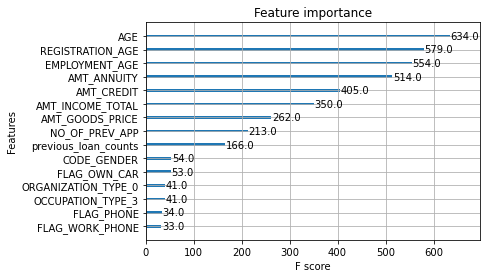

In [17]:
#Plotting the feature importance
xgb.plot_importance(Xgboost_model, max_num_features = 15)

In [25]:
#Evaluating the model
y_pred = Xgboost_model.predict_proba(X_test)

XGBoostError: [00:02:27] /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/c_api/c_api_utils.h:159: Invalid missing value: null
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x0000000121919705 dmlc::LogMessageFatal::~LogMessageFatal() + 117
  [bt] (1) 2   libxgboost.dylib                    0x000000012190ea3b xgboost::GetMissing(xgboost::Json const&) + 219
  [bt] (2) 3   libxgboost.dylib                    0x0000000121920b5d void InplacePredictImpl<xgboost::data::ArrayAdapter>(std::__1::shared_ptr<xgboost::data::ArrayAdapter>, std::__1::shared_ptr<xgboost::DMatrix>, char const*, xgboost::Learner*, unsigned long, unsigned long, unsigned long long const**, unsigned long long*, float const**) + 509
  [bt] (3) 4   libxgboost.dylib                    0x0000000121920676 XGBoosterPredictFromDense + 326
  [bt] (4) 5   libffi.7.dylib                      0x000000010f3cdead ffi_call_unix64 + 85



In [12]:
#Plotting the confusion matrix
plot_confusion_matrix(Xgboost_model, X_test, Y_test, values_format ='d', display_labels = ['Not Approved','Approved'])

/Users/amarjotsinghlohia/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


XGBoostError: [23:24:26] /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/c_api/c_api_utils.h:159: Invalid missing value: null
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x0000000121919705 dmlc::LogMessageFatal::~LogMessageFatal() + 117
  [bt] (1) 2   libxgboost.dylib                    0x000000012190ea3b xgboost::GetMissing(xgboost::Json const&) + 219
  [bt] (2) 3   libxgboost.dylib                    0x0000000121920b5d void InplacePredictImpl<xgboost::data::ArrayAdapter>(std::__1::shared_ptr<xgboost::data::ArrayAdapter>, std::__1::shared_ptr<xgboost::DMatrix>, char const*, xgboost::Learner*, unsigned long, unsigned long, unsigned long long const**, unsigned long long*, float const**) + 509
  [bt] (3) 4   libxgboost.dylib                    0x0000000121920676 XGBoosterPredictFromDense + 326
  [bt] (4) 5   libffi.7.dylib                      0x000000010f3cdead ffi_call_unix64 + 85



In [19]:
#Printing the accuracy score
print(accuracy_score(Y_test,y_pred))

NameError: name 'y_pred' is not defined

In [20]:
#Printing the classification report
print(classification_report(Y_test, y_pred))

NameError: name 'y_pred' is not defined

### ROC curve plot

In [ ]:
probs = XGboost_model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
sns.lineplot([0,1],[0,1], color='red', linestyle='--')
plt = sns.lineplot(fpr, tpr, marker = '.',label='ROC Curve')

In [ ]:
#Drawing the Tree plot for the XGBoost model decision tree.

node_params = { 'shape': 'box', 'style': 'filled, rounded', 'fillcolor': '#78cbe'}
leaf_params = { 'shape': 'box', 'style': 'filled', 'fillcolor': '#e43088'}

xgb.to_graphviz(Xgboost_model, num_trees = 0, size = '12,10', condition_node_params= node_params, leaf_node_params= leaf_params, rankdir= 'TB')